In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
movie_industry = pd.read_csv(r"C:\Users\alexc\OneDrive\Documents\Portfolio_Projects\Correlation\Correlation_movies\movies.csv")

In [63]:
movie_industry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


Checking for NaN values in each column:

In [64]:
movie_industry.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

Removing all the rows that contain a NAN value:


In [65]:
movie_industry_1 = movie_industry.copy()
movie_industry_1.dropna("rows",how="any",inplace=True)

 The percentage of rows that were removed from the dataset:
 

In [66]:
round(((len(movie_industry)-len(movie_industry_1))/len(movie_industry)) * 100,2)

29.3

    This is a problem since there is about a third of the data being removed due to missing values...

    Might want to try and filling in those missing values with the correct data, however if thats not possible then another option is creating a predictive model
    and filling in the NaN values.

    The begginning portion of this project will be cleaning and visualizing the data where the NAN values are dropped. 
    
    Then the other half of the project will be filling in the NAN Values with a Linear model

### Things to change in the dataset:
* Noticed that the year column has values that are incorrect. Grab the correct year from the released column

* Remove the (country) from the released column... there shouldnt be any country name within a date column. 

*  Change certain column datatypes

In [67]:
# removing (country) from released column
movie_industry_1["released"] = movie_industry_1["released"].str.replace(r"\(.*\)","")
movie_industry_1

<ipython-input-67-3f3fd789bb11>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  movie_industry_1["released"] = movie_industry_1["released"].str.replace(r"\(.*\)","")


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980",8.40,927000.00,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.00,46998772.00,Warner Bros.,146.00
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980",5.80,65000.00,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.00,58853106.00,Columbia Pictures,104.00
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980",8.70,1200000.00,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.00,538375067.00,Lucasfilm,124.00
3,Airplane!,PG,Comedy,1980,"July 2, 1980",7.70,221000.00,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.00,83453539.00,Paramount Pictures,88.00
4,Caddyshack,R,Comedy,1980,"July 25, 1980",7.30,108000.00,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.00,39846344.00,Orion Pictures,98.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020",6.60,140000.00,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.00,426505244.00,Columbia Pictures,124.00
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020",6.50,102000.00,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.00,319715683.00,Paramount Pictures,99.00
7650,Dolittle,PG,Adventure,2020,"January 17, 2020",5.60,53000.00,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.00,245487753.00,Universal Pictures,101.00
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020",6.80,42000.00,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.00,111105497.00,20th Century Studios,100.00


converting released column into datetime dtype:

In [68]:
movie_industry_1["released"] = pd.to_datetime(movie_industry_1["released"])

Now grabbing the year from the released column, and storing those values into the year column:

In [69]:
movie_industry_1["year"] = movie_industry_1["released"].dt.year

converting the year column into an int dtype:

In [70]:
movie_industry_1["year"] = movie_industry_1["year"].astype("int64")

Making sure that the data types were changed to what they were supposed to be:

In [71]:
movie_industry_1.dtypes

name                object
rating              object
genre               object
year                 int64
released    datetime64[ns]
score              float64
votes              float64
director            object
writer              object
star                object
country             object
budget             float64
gross              float64
company             object
runtime            float64
dtype: object

Checking the DataFrame to see if there are any other changes to be made. If there aren't any errors, then i move onto visualizing the data:

In [72]:
movie_industry_1

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,1980-06-13,8.40,927000.00,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.00,46998772.00,Warner Bros.,146.00
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,5.80,65000.00,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.00,58853106.00,Columbia Pictures,104.00
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,8.70,1200000.00,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.00,538375067.00,Lucasfilm,124.00
3,Airplane!,PG,Comedy,1980,1980-07-02,7.70,221000.00,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.00,83453539.00,Paramount Pictures,88.00
4,Caddyshack,R,Comedy,1980,1980-07-25,7.30,108000.00,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.00,39846344.00,Orion Pictures,98.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,2020-01-17,6.60,140000.00,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.00,426505244.00,Columbia Pictures,124.00
7649,Sonic the Hedgehog,PG,Action,2020,2020-02-14,6.50,102000.00,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.00,319715683.00,Paramount Pictures,99.00
7650,Dolittle,PG,Adventure,2020,2020-01-17,5.60,53000.00,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.00,245487753.00,Universal Pictures,101.00
7651,The Call of the Wild,PG,Adventure,2020,2020-02-21,6.80,42000.00,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.00,111105497.00,20th Century Studios,100.00


***
## Visualization:

In [73]:
visualize_movie = movie_industry_1.copy()
visualize_movie["count"] = 1
visualize_movie.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,count
0,The Shining,R,Drama,1980,1980-06-13,8.40,927000.00,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.00,46998772.00,Warner Bros.,146.00,1
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,5.80,65000.00,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.00,58853106.00,Columbia Pictures,104.00,1
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,8.70,1200000.00,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.00,538375067.00,Lucasfilm,124.00,1
3,Airplane!,PG,Comedy,1980,1980-07-02,7.70,221000.00,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.00,83453539.00,Paramount Pictures,88.00,1
4,Caddyshack,R,Comedy,1980,1980-07-25,7.30,108000.00,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.00,39846344.00,Orion Pictures,98.00,1


In [74]:
pd.set_option("display.float_format", lambda x: "%.2f"% x)

In [75]:
visualize_genre = visualize_movie.groupby("genre")[["gross","count","budget"]].sum().reset_index()
visualize_genre.sort_values(by="gross",ascending=True)

,genre,gross,count,budget
14,Western,20025886.00,2,21000000.00
11,Romance,167876905.00,5,120200000.00
12,Sci-Fi,225660614.00,6,146500000.00
13,Thriller,297416988.00,7,89200000.00
8,Fantasy,1635026609.00,41,706200000.00
10,Mystery,2004091467.00,17,541900001.00
7,Family,2074332587.00,4,204500000.00
9,Horror,14261055032.00,251,3372067000.00
3,Biography,19093930296.00,311,7912358768.00
5,Crime,20017662162.00,399,9018556080.00


<ipython-input-76-ce327e6ef952>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(visualize_genre["genre"],rotation="vertical",size=10)


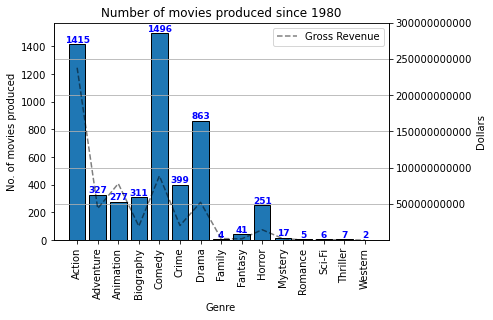

In [76]:
fig, ax1 = plt.subplots() 

ax2 = ax1.twinx()
ax1.bar(visualize_genre["genre"],visualize_genre["count"],ec="black") # creates a bar graph(x values, y values, color of bars)
ax2.plot(visualize_genre["genre"],visualize_genre["gross"],linestyle="dashed",color="black",label="Gross Revenue",alpha=.5) 

ax1.set_xlabel("Genre")
ax1.set_ylabel("No. of movies produced",color="black")
ax1.set_xticklabels(visualize_genre["genre"],rotation="vertical",size=10)
for i in range(len(visualize_genre["genre"])):
    ax1.text(i,visualize_genre["count"][i],visualize_genre["count"][i],ha="center",va="bottom",size="9",color="blue",weight="bold")
ax2.set_ylabel("Dollars",color="Black")
ax2.ticklabel_format(axis="y",style="plain")
ax2.set_ylim(21000000.00,300000000000)
ax2.legend()
plt.title("Number of movies produced since 1980")
plt.grid()
plt.show()

Insights:
* Genre with the most movies produced: Comedy --> 1496
* Genre with the lowest movies produced: Western --> 2
* Genre with the highest Gross revenue: Action --> 237,752,868,767
* Genre with the lowest Gross revenue: Western --> 20,025,886

## Creating a Bar chart of the top 10 contries by movies produced: 
**This is based on the DataFrame that had all the NAN values removed**

In [77]:
countries_graph = visualize_movie.groupby("country")[["count","budget","gross"]].sum().reset_index()
countries_graph = countries_graph.sort_values(by="count",ascending=False).head(10)
countries_graph = countries_graph.reset_index().drop(columns="index")
countries_graph

,country,count,budget,gross
0,United States,4319,161460055145.00,470794726099.00
1,United Kingdom,492,16432023780.00,45351705966.00
2,Canada,111,2542177000.00,5734558085.00
3,France,105,3304500000.00,6568533115.00
4,Germany,82,3344750000.00,5688083409.00
5,Australia,42,1080950000.00,2800304264.00
6,Japan,28,638100000.00,2494214085.00
7,China,26,1846400000.00,6305918953.00
8,Hong Kong,24,653428966.00,1412222241.00
9,Ireland,21,342450000.00,506907090.00


<ipython-input-78-e2edf2250c53>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(countries_graph["country"],rotation="vertical")


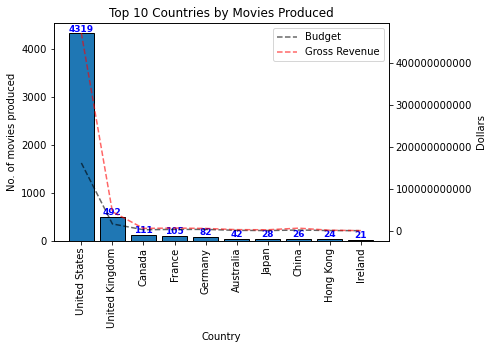

In [78]:
fig, ax1 = plt.subplots() 

ax2 = ax1.twinx()
ax1.bar(countries_graph["country"],countries_graph["count"],ec="black")
ax2.plot(countries_graph["country"],countries_graph["budget"],"black",linestyle="dashed",alpha=.60,label="Budget")
ax2.plot(countries_graph["country"],countries_graph["gross"],"red",linestyle="dashed",alpha=.60,label="Gross Revenue")

ax1.set_xticklabels(countries_graph["country"],rotation="vertical")
ax1.set_xlabel("Country")
ax1.set_ylabel("No. of movies produced",color="black")
for i in range(len(countries_graph["country"])):
    ax1.text(i,countries_graph["count"][i],countries_graph["count"][i],ha="center",va="bottom",size="9",color="blue",weight="bold")
ax2.ticklabel_format(axis="y",style="plain")
ax2.set_ylabel("Dollars")
ax2.legend()
plt.title("Top 10 Countries by Movies Produced")
plt.show()

## Creating a bar chart showing the breakdown of all US movies by genre:
**This is based on the DataFrame that had all the NAN values removed**

In [79]:
countries_graph_2 = visualize_movie[visualize_movie["country"] == "United States"]
US_graph = countries_graph_2.groupby("genre")[["count","budget","gross"]].sum().reset_index()
US_graph

,genre,count,budget,gross
0,Action,1149,70214133376.00,201789538763.00
1,Adventure,229,9187530000.00,25470406604.00
2,Animation,214,18523470000.00,71626703799.00
3,Biography,205,5702461000.00,13613691229.00
4,Comedy,1313,30857178768.00,79912262442.00
5,Crime,311,7386955000.00,17100714388.00
6,Drama,628,15290112000.00,43047362688.00
7,Family,4,204500000.00,2074332587.00
8,Fantasy,33,603200000.00,1445429403.00
9,Horror,205,2691215000.00,12137971720.00


<ipython-input-80-43218fa9dd0a>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(US_graph["genre"],rotation="vertical")


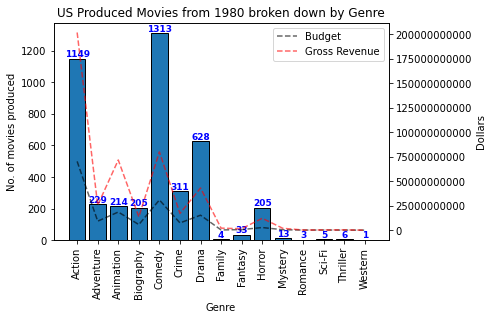

In [80]:
fig, ax1 = plt.subplots() 

ax2 = ax1.twinx()
ax1.bar(US_graph["genre"],US_graph["count"],ec="black")
ax2.plot(US_graph["genre"],US_graph["budget"],"black",linestyle="dashed",alpha=.60,label="Budget")
ax2.plot(US_graph["genre"],US_graph["gross"],"red",linestyle="dashed",alpha=.60,label="Gross Revenue")

ax1.set_xticklabels(US_graph["genre"],rotation="vertical")
ax1.set_xlabel("Genre")
ax1.set_ylabel("No. of movies produced",color="black")
for i in range(len(US_graph["genre"])):
    ax1.text(i,US_graph["count"][i],US_graph["count"][i],ha="center",va="bottom",size="9",color="blue",weight="bold")
ax2.ticklabel_format(axis="y",style="plain")
ax2.set_ylabel("Dollars")
ax2.legend()
plt.title("US Produced Movies from 1980 broken down by Genre")
plt.show()

## Creating a Bar chart of the top 20 Directors by total amount of Movies directed: 
**This is based on the DataFrame that had all the NAN values removed**

In [81]:
director_graph = visualize_movie.groupby("director").aggregate({"count":"sum","budget":"mean","gross":"mean"}).reset_index()
director_graph = director_graph.sort_values(by="count",ascending=False).head(20).reset_index()
director_graph = director_graph.drop(columns="index")
director_graph

,director,count,budget,gross
0,Woody Allen,33,17098484.85,28605805.45
1,Clint Eastwood,31,34600000.00,105661995.97
2,Steven Spielberg,27,70055555.56,356631458.15
3,Ron Howard,23,69717391.30,190786633.13
4,Ridley Scott,23,72860869.57,174205030.17
5,Steven Soderbergh,23,31441304.35,98809043.70
6,Joel Schumacher,20,35750000.00,81256642.20
7,Tim Burton,19,75421052.63,234544678.42
8,Martin Scorsese,19,59331578.95,110218468.26
9,Barry Levinson,18,31777777.78,69505142.22


<ipython-input-82-322024142f77>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(director_graph["director"],rotation="vertical")


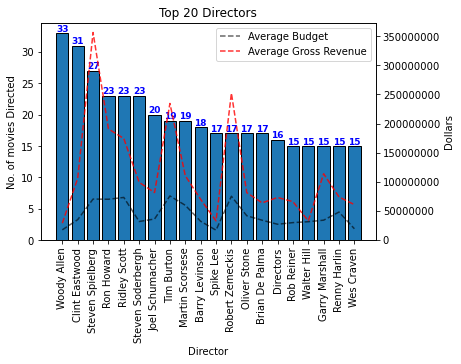

In [82]:
fig, ax1 = plt.subplots() 
ax2 = ax1.twinx()

ax1.bar(director_graph["director"],director_graph["count"],ec="black")
ax2.plot(director_graph["director"],director_graph["budget"],"black",linestyle="dashed",alpha=.60,label="Average Budget")
ax2.plot(director_graph["director"],director_graph["gross"],"red",linestyle="dashed",alpha=.80,label="Average Gross Revenue")

ax1.set_xticklabels(director_graph["director"],rotation="vertical")
ax1.set_xlabel("Director")
ax1.set_ylabel("No. of movies Directed",color="black")
for i in range(len(director_graph["director"])):
    ax1.text(i,director_graph["count"][i],director_graph["count"][i],ha="center",va="bottom",size="9",color="blue",weight="bold")


ax2.ticklabel_format(axis="y",style="plain")
ax2.set_ylabel("Dollars")
ax2.legend()
plt.title("Top 20 Directors")
plt.show()

## Creating a Line graph of the total movies produced since 1980: 
**This is based on the DataFrame that had all the NAN values removed**

In [83]:
year_graph = visualize_movie.groupby("year")["count"].sum().reset_index() # creating a df that only contains the years and the total amount of movies produced in that year

In [84]:
year_graph2 = visualize_movie.groupby("year")["count"].sum().reset_index()
year_graph2 = year_graph2[year_graph2["year"]%2 == 0]
year_graph2

,year,count
0,1980,36
2,1982,71
4,1984,88
6,1986,98
8,1988,120
10,1990,108
12,1992,124
14,1994,134
16,1996,143
18,1998,148


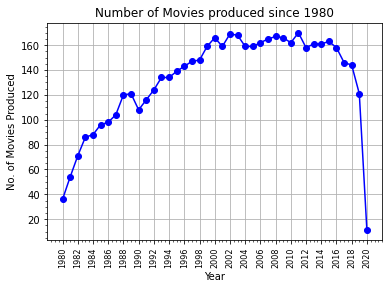

In [85]:
plt.plot(year_graph["year"],year_graph["count"],linestyle="-",marker="o",color="blue")
plt.xticks(year_graph2["year"],rotation="vertical",size=8)
plt.xlabel("Year")
plt.ylabel("No. of Movies Produced")
plt.minorticks_on()
plt.title("Number of Movies produced since 1980")
plt.grid()
plt.show()

## Creating a Bar chart of the top 20 Actors by movies starred in: 
**This is based on the DataFrame that had all the NAN values removed**

In [86]:
actor_graph = visualize_movie.groupby("star").aggregate({"count":"sum","budget":"mean","gross":"mean"}).sort_values("count",ascending=False).reset_index()
actor_graph = actor_graph.head(20)
actor_graph

,star,count,budget,gross
0,Nicolas Cage,40,50186250.00,103982062.60
1,Tom Hanks,38,60315789.47,260524865.87
2,Robert De Niro,38,40513157.89,60752241.97
3,Bruce Willis,34,60067647.09,156439736.35
4,Tom Cruise,33,76887878.79,286069996.21
5,Denzel Washington,33,51560606.06,107234887.42
6,Sylvester Stallone,32,48487500.00,115073361.28
7,Johnny Depp,31,87048387.10,239036301.74
8,Adam Sandler,28,61525000.00,176770244.89
9,Kevin Costner,27,42388888.89,104600435.67


<ipython-input-87-81a8dceb838a>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(actor_graph["star"],rotation="vertical")


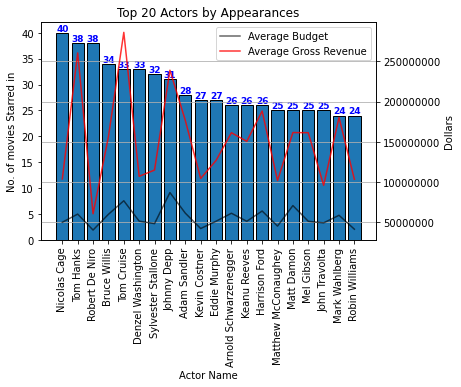

In [87]:
fig, ax1 = plt.subplots() 
ax2 = ax1.twinx()

ax1.bar(actor_graph["star"],actor_graph["count"],ec="black")
ax2.plot(actor_graph["star"],actor_graph["budget"],"black",linestyle="-",alpha=.60,label="Average Budget")
ax2.plot(actor_graph["star"],actor_graph["gross"],"red",linestyle="-",alpha=.80,label="Average Gross Revenue")

ax1.set_xticklabels(actor_graph["star"],rotation="vertical")
ax1.set_xlabel("Actor Name")
ax1.set_ylabel("No. of movies Starred in",color="black")
for i in range(len(actor_graph["star"])):
    ax1.text(i,actor_graph["count"][i],actor_graph["count"][i],ha="center",va="bottom",size="9",color="blue",weight="bold")


ax2.ticklabel_format(axis="y",style="plain")
ax2.set_ylabel("Dollars")
ax2.legend()
plt.grid()
plt.title("Top 20 Actors by Appearances")
plt.show()

## Creating a Bar chart of the top 20 companies by movies produced: 
**This is based on the DataFrame that had all the NAN values removed**

In [88]:
company_graph = visualize_movie.groupby("company").aggregate({"count":"sum","budget":"mean","gross":"mean"}).sort_values("count",ascending=False).reset_index()
company_graph = company_graph.head(20)

<ipython-input-89-eb9e78fecdb8>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(company_graph["company"],rotation="vertical")


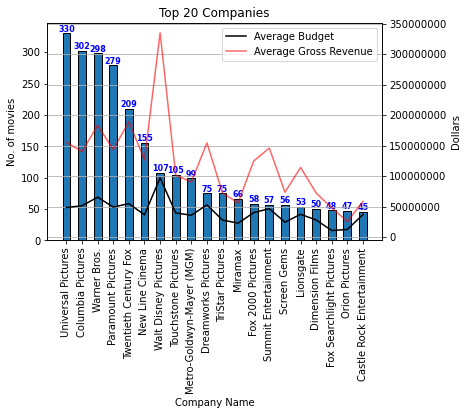

In [89]:
fig, ax1 = plt.subplots() 
ax2 = ax1.twinx()

ax1.bar(company_graph["company"],company_graph["count"],ec="black",align="center",width=.5)
ax2.plot(company_graph["company"],company_graph["budget"],"black",linestyle="-",label="Average Budget")
ax2.plot(company_graph["company"],company_graph["gross"],"red",linestyle="-",alpha=.60,label="Average Gross Revenue")

ax1.set_xticklabels(company_graph["company"],rotation="vertical")
ax1.set_xlabel("Company Name")
ax1.set_ylabel("No. of movies",color="black")
for i in range(len(company_graph["company"])):
    ax1.text(i,company_graph["count"][i],company_graph["count"][i],ha="center",va="bottom",size="8",color="blue",weight="bold")


ax2.ticklabel_format(axis="y",style="plain")
ax2.set_ylabel("Dollars")
ax2.legend()
plt.grid()
plt.title("Top 20 Companies")
plt.show()

***
# Correlation:

In [90]:
import scipy.stats
import seaborn as sns

In [91]:
scipy.stats.linregress(movie_industry_1["budget"],movie_industry_1["gross"])

LinregressResult(slope=3.3350718439271474, intercept=-16863517.225031763, rvalue=0.7402465439219631, pvalue=0.0, stderr=0.04114862117435227, intercept_stderr=2263057.059486906)

In [92]:
slope,intercept,r,p,stderr = scipy.stats.linregress(movie_industry_1["budget"],movie_industry_1["gross"])
print(slope)
print(intercept)
print(r)
print(stderr)

3.3350718439271474
-16863517.225031763
0.7402465439219631
0.04114862117435227


In [93]:
line = f"Regression line: Y = {slope:.2f}x + {intercept:.2f} \nr = {r:.2f}"
line

'Regression line: Y = 3.34x + -16863517.23 \nr = 0.74'

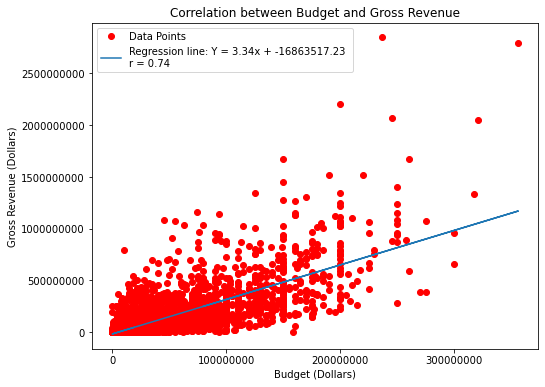

In [94]:
plt.figure(figsize=(8,6))
plt.plot(movie_industry_1["budget"],movie_industry_1["gross"],linewidth=0,marker="o",color="r",label="Data Points")
plt.plot(movie_industry_1["budget"],slope*movie_industry_1["budget"]+intercept,label = line)
plt.ticklabel_format(style="plain")
plt.locator_params(axis="x",nbins=7)
plt.title("Correlation between Budget and Gross Revenue")
plt.xlabel("Budget (Dollars)")
plt.ylabel("Gross Revenue (Dollars)")
plt.legend()
plt.show()

Budget and Gross Revenue have a high correlation. which means as one goes up the other tends to increase as well.

However, just because there is a high correlation does not imply causation...
There can be other factors in the background that can be causing Gross revenue to increase when budget increases, such as: Actors involved, Highly demanded movie, Director etc.

In [95]:
correlation_matrix = movie_industry_1.corr(method="pearson")
correlation_matrix

,year,score,votes,budget,gross,runtime
year,1.00,0.06,0.20,0.32,0.27,0.08
score,0.06,1.00,0.47,0.07,0.22,0.41
votes,0.20,0.47,1.00,0.44,0.61,0.35
budget,0.32,0.07,0.44,1.00,0.74,0.32
gross,0.27,0.22,0.61,0.74,1.00,0.28
runtime,0.08,0.41,0.35,0.32,0.28,1.00


<function matplotlib.pyplot.show(close=None, block=None)>

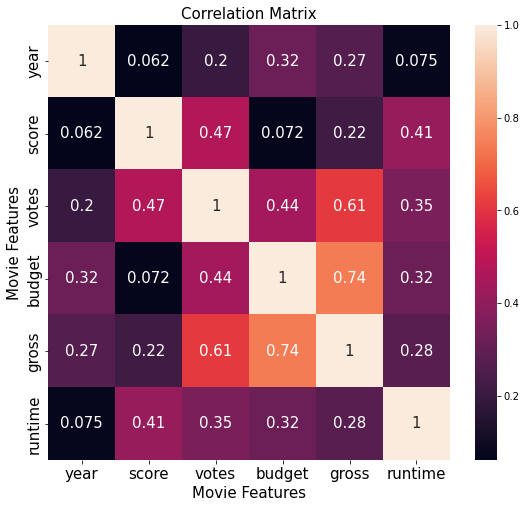

In [96]:
plt.figure(figsize=(9,8))
sns.heatmap(correlation_matrix,annot=True,annot_kws={"size":15})
plt.yticks(va="center",fontsize=15)
plt.xticks(ha="center",fontsize=15)
plt.title("Correlation Matrix",fontsize=15)
plt.ylabel("Movie Features",fontsize=15)
plt.xlabel("Movie Features",fontsize=15)
plt.show

In [97]:
random = correlation_matrix[(correlation_matrix > .5) & (correlation_matrix < 1)].fillna("-")
random

,year,score,votes,budget,gross,runtime
year,-,-,-,-,-,-
score,-,-,-,-,-,-
votes,-,-,-,-,0.61,-
budget,-,-,-,-,0.74,-
gross,-,-,0.61,0.74,-,-
runtime,-,-,-,-,-,-


Changing the string columns into numbers so we can see if there is a correlation between the other variables:

In [98]:
correlation_df = movie_industry_1.copy()

for col_name in correlation_df.columns:
    if(correlation_df[col_name].dtype == "object"):
        correlation_df[col_name] = correlation_df[col_name].astype("category")
        correlation_df[col_name] = correlation_df[col_name].cat.codes

In [99]:
correlation_df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4692,6,6,1980,1980-06-13,8.40,927000.00,1795,2832,699,46,19000000.00,46998772.00,1426,146.00
1,3929,6,1,1980,1980-07-02,5.80,65000.00,1578,1158,214,47,4500000.00,58853106.00,452,104.00
2,3641,4,0,1980,1980-06-20,8.70,1200000.00,757,1818,1157,47,18000000.00,538375067.00,945,124.00
3,204,4,4,1980,1980-07-02,7.70,221000.00,889,1413,1474,47,3500000.00,83453539.00,1108,88.00
4,732,6,4,1980,1980-07-25,7.30,108000.00,719,351,271,47,6000000.00,39846344.00,1083,98.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,415,6,0,2020,2020-01-17,6.60,140000.00,16,2390,1812,47,90000000.00,426505244.00,452,124.00
7649,3556,4,0,2020,2020-02-14,6.50,102000.00,852,2309,147,47,85000000.00,319715683.00,1108,99.00
7650,1153,4,1,2020,2020-01-17,5.60,53000.00,1809,2827,1470,47,175000000.00,245487753.00,1397,101.00
7651,3978,4,1,2020,2020-02-21,6.80,42000.00,294,2091,640,6,135000000.00,111105497.00,12,100.00


In [100]:
correlation_matrix_final = correlation_df.corr()

<function matplotlib.pyplot.show(close=None, block=None)>

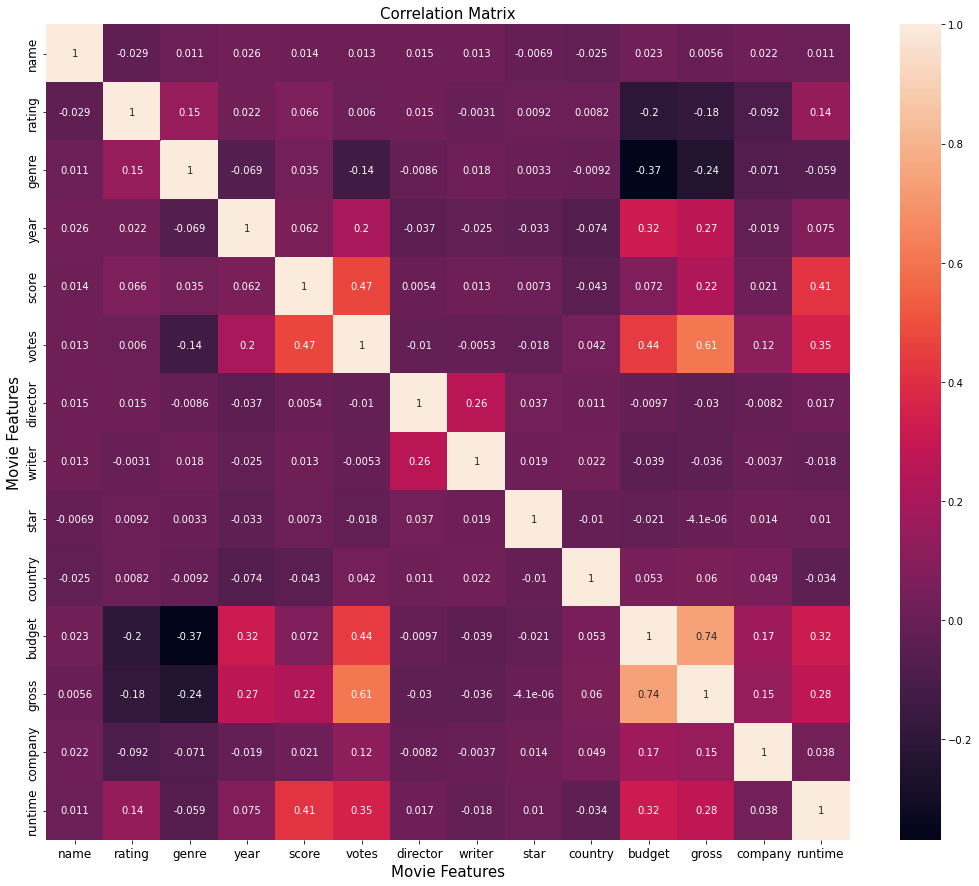

In [101]:
plt.figure(figsize=(18,15))
sns.heatmap(correlation_matrix_final,annot=True,annot_kws={"size":10})
plt.yticks(va="center",fontsize=12)
plt.xticks(ha="center",fontsize=12)
plt.title("Correlation Matrix",fontsize=15)
plt.ylabel("Movie Features",fontsize=15)
plt.xlabel("Movie Features",fontsize=15)
plt.show

In [102]:
correlation_matrix_final_1 = correlation_matrix_final[(correlation_matrix_final > .5) | (correlation_matrix_final < -.5)].fillna(0)

Showing Correlations greater than .5 and less than -.5:

<function matplotlib.pyplot.show(close=None, block=None)>

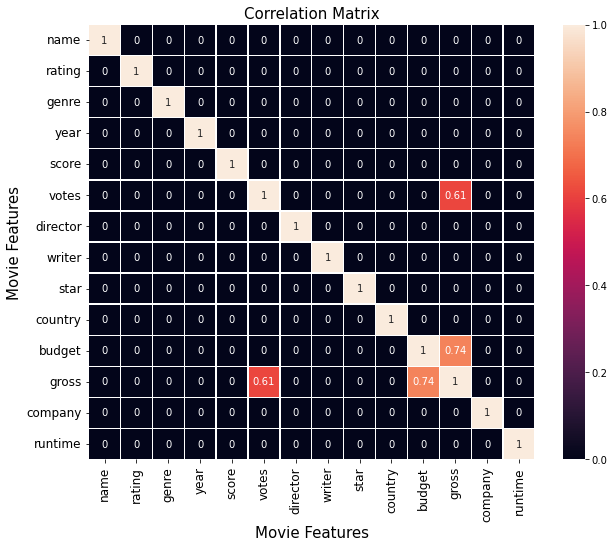

In [103]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix_final_1,annot=True,annot_kws={"size":10},linewidths=.35)
plt.yticks(va="center",fontsize=12)
plt.xticks(ha="center",fontsize=12)
plt.title("Correlation Matrix",fontsize=15)
plt.ylabel("Movie Features",fontsize=15)
plt.xlabel("Movie Features",fontsize=15)
plt.show

There are only two variables that have a significant correlation:
* Votes and Gross 
* Budget and Gross

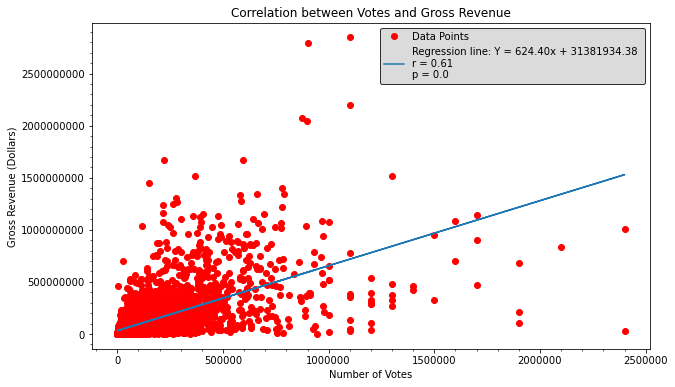

In [104]:
slope,intercept,r,p,stderr = scipy.stats.linregress(movie_industry_1["votes"],movie_industry_1["gross"])

line_2 = f"Regression line: Y = {slope:.2f}x + {intercept:.2f} \nr = {r:.2f}\np = {p}"

plt.figure(figsize=(10,6))
plt.plot(movie_industry_1["votes"],movie_industry_1["gross"],linewidth=0,marker="o",color="r",label="Data Points")
plt.plot(movie_industry_1["votes"],slope*movie_industry_1["votes"]+intercept,label = line_2,linewidth=1.5)
plt.ticklabel_format(style="plain")
plt.locator_params(axis="x",nbins=7)
plt.title("Correlation between Votes and Gross Revenue")
plt.xlabel("Number of Votes")
plt.ylabel("Gross Revenue (Dollars)")
plt.minorticks_on()
plt.legend(facecolor="lightgray",edgecolor="black")
plt.show()

****
## Creating a  Linear Regression Model to fill in the NAN values in the budget & gross column:

In [105]:
from sklearn.linear_model import LinearRegression

Creating the model using the Dataframe "movie_industry_1" since it has no NaN values:

In [106]:
X_budget = movie_industry_1.iloc[:,11].values.reshape(-1,1)
X_budget
Y_gross = movie_industry_1.iloc[:,12].values
Y_gross
lr = LinearRegression()
model = lr.fit(X_budget,Y_gross)

Taking a hard copy of the original DataFrame "movie_industry" and storing it in movie_industry_estimation. Doing this so there is always a version to fall back on if something happens to the data:

In [107]:
movie_industry_estimation = movie_industry.copy()

### Dropping the rows that have both budget and gross column values as NAN:

In [108]:
#checking how many pairs of NaN Values there are
len(movie_industry_estimation[(movie_industry_estimation["budget"].isna())&(movie_industry_estimation["gross"].isna())])

128

In [109]:
# Dropping the pair of NaN Values
movie_industry_estimation = movie_industry_estimation.dropna(subset=["budget","gross"],how="all")

### filling in the NAN values in the gross column using the model:

In [110]:
missing_gross_values_2 = movie_industry_estimation[movie_industry_estimation["gross"].isna()].copy()
missing_gross_values_2 = missing_gross_values_2["budget"].values.reshape(-1,1)

In [111]:
results = model.predict(missing_gross_values_2)

In [112]:
movie_industry_estimation.loc[movie_industry_estimation["gross"].isna(),"gross"] = results

### Using the inverse function of the Linear regression above to fill in the missing budget values. 

In [113]:
movie_industry_estimation["budget"] = movie_industry_estimation["budget"].fillna((movie_industry_estimation["gross"] + 16863517.23)/3.34)

### Dropping the remaining NaN Values:

In [114]:
movie_industry_estimation.dropna(how="any",inplace=True)

***
### Storing the dataframe movie_industry_estimation as an excel file and CSV:

In [ ]:
#Stores DF as an excel file
movie_industry_estimation.to_excel("movie_industry.xlsx")

# Stores DF as a CSV file
movie_industry_estimation.to_csv("movie_industry.csv")